<a href="https://colab.research.google.com/github/sarathb818/RNN/blob/main/rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences 
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import SimpleRNN,Dense,Activation
from keras.utils import plot_model
from keras.preprocessing.text import Tokenizer

In [2]:
#fix random seed so that we can easily reproduce the results
np.random.seed(13)

In [3]:
#pad input sequences
max_review_length=500
top_words=5000
(X_train,y_train),(X_test,y_test)=imdb.load_data(num_words=top_words)

17465344/17464789 [==============================] - 2s 0us/step


In [4]:
print("Y train values: ",np.unique(y_train))
print("Y test values: ",np.unique(y_test))

Y train values:  [0 1]
Y test values:  [0 1]


In [5]:
unique,counts = np.unique(y_train,return_counts=True)
print("y train distribution: ", dict(zip(unique,counts)))

y train distribution:  {0: 12500, 1: 12500}


In [6]:
review_len_train = []
review_len_test = []
for i,j in zip(X_train,X_test):
    review_len_train.append(len(i))
    review_len_test.append(len(j))

In [7]:
print("min: ", min(review_len_train), "max: ", max(review_len_train))

min:  11 max:  2494


In [8]:
print("min: ", min(review_len_test), "max: ", max(review_len_test))

min:  7 max:  2315


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


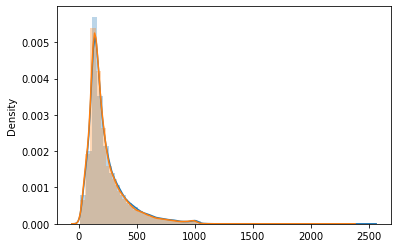

In [9]:
sns.distplot(review_len_train,hist_kws={"alpha":0.3});
sns.distplot(review_len_test,hist_kws={"alpha":0.3});

In [10]:
print("Train mean: ",np.mean(review_len_train))
print("Train median: ",np.median(review_len_train))
print("Train mode: ",stats.mode(review_len_train))

Train mean:  238.71364
Train median:  178.0
Train mode:  ModeResult(mode=array([132]), count=array([196]))


In [11]:
# number or words
word_index = imdb.get_word_index()
print(type(word_index))

1646592/1641221 [==============================] - 0s 0us/step
<class 'dict'>


In [12]:
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

In [13]:
# Summarize number of words
print("Number of words: ")
print(len(np.unique(np.hstack(X))))

Number of words: 
4998


In [15]:
from matplotlib import pyplot

Review length: 
Mean 234.76 words (172.911495)


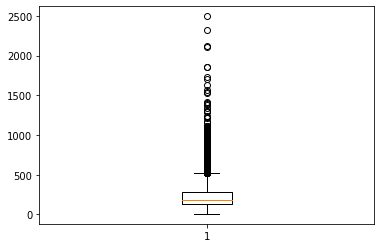

In [16]:
# Summarize review length
print("Review length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
# plot review length
pyplot.boxplot(result)
pyplot.show()

In [21]:
for keys,values in word_index.items():
    if values == 1:
        print(keys)

the


In [22]:
def text(index=7):
    reverse_index = dict([(value,key) for (key,value) in word_index.items()])
    decode_review = " ".join([reverse_index.get(i-3, "!") for i in X_train[index]])
    print(decode_review)
    print(y_train[index])
    return decode_review
    decoded_review = text()

In [23]:
decoded_review = text(25)

! this is a very light headed comedy about a wonderful family that has a son called ! because he use to ! at his food ! loves to take all kinds of pictures of the people in a small ! of ! ! and manages to get the attention of a group of photo art lovers from new york city ! has a cute sister who goes simply nuts over ! and is actually an ! taking ! of ! from a bag there are scenes of men showing off the ! in their ! with ! movements and ! doing pretty much the same it is rather hard to keep your mind out of the ! with this film but who cares it is only a film to give you a few laughs at a simple picture made in !
1


In [24]:
decoded_review = text(45)

! in this swimming pool this ! there are water ! and there are ! ! sit on water ! the ! and water lily have a ! relationship marie ! ! is a water lily a ! swimming ! with a crush on ! ! ! a ! the captain of her team ! ! ! their leader because the ! ! and well ! blonde ! a loose persona that ! the ! ! ! of ! and ! but ! has a secret the ! has a ! which ! ! ! reveals to the audience visually before she ! in marie br br ! has never gone as they say all the way with a boy br br at a party we see a double image of the ! sex bomb checking her make up in a bathroom mirror ! is a ! ! marie gets to know ! double while her imitation breaks the water ! heart while the ! goes through the ! of catching flies for ! sake she gets ! with the water lily when no one's looking in the film's most ! scene the water lily agrees to give the ! a hand in losing her ! through the mechanical act of ! ! ! wants boys to like her but she doesn't like boys seemingly but it's more important to the ! that she's popula

In [25]:
num_words = 25000
(X_train,Y_train),(X_test,Y_test) = imdb.load_data(num_words=num_words)

In [26]:
maxlen=130
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [27]:
print("X train shape: ",X_train.shape)

X train shape:  (25000, 130)


In [28]:
print(X_train[7])

[  188     6    55   655   707  6371   956   225  1456   841    42  1310
   225     6  2493  1467  7722  2828    21     4 14906     9   364    23
     4  2228  2407   225    24    76   133    18     4   189  2293    10
    10   814    11     2    11  2642    14    47    15   682   364   352
   168    44    12    45    24   913    93    21   247  2441     4   116
    34    35  1859     8    72   177     9   164     8   901   344    44
    13   191   135    13   126   421   233    18   259    10    10     4
 14906  6847     4 14065  3074     7   112   199   753   357    39    63
    12   115 15222   763     8    15    35  3282  1523    65    57   599
     6  1916   277  1730    37    25    92   202     6  8848    44    25
    28     6    22    15   122    24  4171    72    33    32]


In [29]:
for i in X_train[0:10]:
    print(len(i))

130
130
130
130
130
130
130
130
130
130


In [30]:
model = Sequential()

model.add(Embedding(num_words,32,input_length =len(X_train[0])))
model.add(SimpleRNN(16,input_shape = (num_words,maxlen), return_sequences=False,activation="relu"))
model.add(Dense(1)) #flatten
model.add(Activation("sigmoid")) #using sigmoid for binary classification
model.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

In [31]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 130, 32)           800000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 16)                784       
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 800,801
Trainable params: 800,801
Non-trainable params: 0
_________________________________________________________________
None


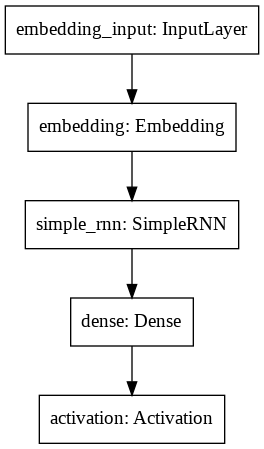

In [32]:
from keras.utils import plot_model
plot_model(model)

In [34]:
history = model.fit(X_train,Y_train,validation_data = (X_test,Y_test),epochs = 20,batch_size=128,verbose = 1)

Epoch 1/20
196/196 [==============================] - 8s 42ms/step - loss: 0.0906 - accuracy: 0.9666 - val_loss: 0.5495 - val_accuracy: 0.8400
Epoch 2/20
196/196 [==============================] - 8s 43ms/step - loss: 0.0790 - accuracy: 0.9712 - val_loss: 0.6593 - val_accuracy: 0.8332
Epoch 3/20
196/196 [==============================] - 8s 43ms/step - loss: 0.0738 - accuracy: 0.9730 - val_loss: 0.5485 - val_accuracy: 0.8423
Epoch 4/20
196/196 [==============================] - 8s 42ms/step - loss: 0.0646 - accuracy: 0.9783 - val_loss: 0.4885 - val_accuracy: 0.8110
Epoch 5/20
196/196 [==============================] - 8s 42ms/step - loss: 0.0604 - accuracy: 0.9788 - val_loss: 0.6207 - val_accuracy: 0.8294
Epoch 6/20
196/196 [==============================] - 8s 42ms/step - loss: 0.0568 - accuracy: 0.9808 - val_loss: 0.7236 - val_accuracy: 0.8346
Epoch 7/20
196/196 [==============================] - 8s 42ms/step - loss: 0.0514 - accuracy: 0.9828 - val_loss: 0.6419 - val_accuracy: 0.8364

In [35]:
score = model.evaluate(X_test,Y_test)

782/782 [==============================] - 4s 5ms/step - loss: 1.9266 - accuracy: 0.8042


In [36]:
def plot_len_cur(history):
  pd.DataFrame(history.history).plot(figsize=(15,8))
  plt.grid(True)
  plt.gca().set_ylim(0,1)
  plt.show()

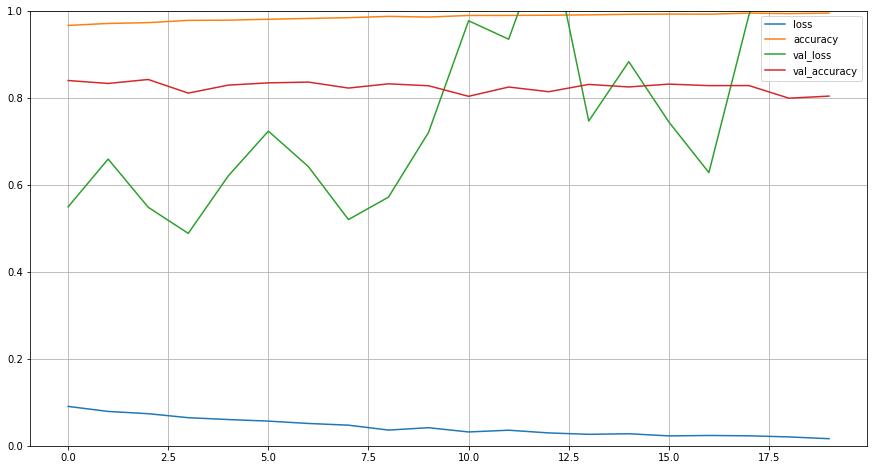

In [37]:
plot_len_cur(history)